# CAPSTONE PROJECT - BATTLE OF NEIGHBORHOODS - COIMBATORE

### TABLE OF CONTENTS
 - INTRODUCTION
 - DATA DESCRIPTION
 - METHODOLOGY AND ANALYSIS
 - RESULTS AND DISCUSSION
 - CONCLUSION

# INTRODUCTION

## Background

> **Coimbatore** is fast growing city and among the top ten districts in TamilNadu, India. It has a population of around 1.6 million people and the city proves to be a great place for living and also for starting new business. Many IT companies have opened their branch in Coimbatore and because of the that more people are moving with their families to Coimbatore which also led to many venues have started showing up in and around Coimbatore.

## Business Problem Description

> Because of more people moving into Coimbatore, the rent rates become very high at some important areas in the city. People starting business considers only those places where population is high or they would start business near city centers. Day by day, as the traffic congestion becoming worse, people from different parts hesitate to travel to places with more venues. So only option for new people is to rent house of high cost in areas with more venues. Business people also does not have any data or report showing them the new areas to explore for starting new business.
 

## Solution

> This project intends to find out the rent rates in important areas in Coimbatore and the availability of number of venues in those areas.

## Target Audience

> This projects is intended for two audience. 

> **One** is the business poeple who owns the venues. The report will help them to explore new areas. 
E.G. If a person owns a venue in Gandhipuram which is the city center and people in and around Gandhipuram hesitates to go to Gandhipuram everytime due to heavy traffic, then it ultimately affects his business. What if he knows the place where he should consider opening another shop where new people move largely.

> **Two** is the common people who is moving to Coimbatore with their families.



# DATA DESCRIPTION

## To get the desired result, I need the following Data - 
> *Our goal of this project to is find two aspects. One is rent rates in important areas of Coimbatore for them to identify areas with lower rent rates and more venues. Second, for the business people to explore areas where venues are less and where more people will move based on rent rates, so that, they could think of business expansion.*

>  - We need data of rent rates in important areas of Coimbatore. I did a thorough search of such data and found out a structured data from Makkan website. The data contained four **feature sets**.  - **'Neighborhood'**, **'1 BHK'**,**'2BHK'** & **'3BHK'**. However, I thougt it would be wise to find the **mean** of all the **feature Sets** so as to let the people know the average rents for all kinds of house in an area. 

> - Next, we need number of **venues** in those areas which I will pass a query to **Four Square** website to retrieve the data. **Example**, I want to move to area with low rent rates and availability of more venues, especially **gym**. In that case, retrieving venues would be appropriate bacause venues will be clustered and named as per its characteristics.

> - After retrieving the above data, I have planned to create a Choropleth map which will show the areas & their rent rates and number of venues and type of venues in those areas.
> - To create the  Choropleth map to show the different rent rates, I need the Coimbatore geographical border data. But, I could not find data for the latitudes and longitudes. However, I found one file containing the geo data based on ward numbers and fortunately, I was able to find the ward numbers of the important areas of Coimbatore.
> - Next, as I have planned to cluster venues retrieved frmo Foursqaure, I need to get the latitude and longitude data of each location to pass query and get venues data. For getting the latitude and longitude values of importatnt areas, I used Python geocoder package.



# METHODOLOGY & ANALYSIS

## Installing necessary Packages
> As our first step towards our project, we will install all the required packages.

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Neighborhood Data - Coimbatore:

 - As I have described in my Data description content, I was able to collect rental figures of important neighborhoods in Coimbatore from Makaan website. We will download the data using Pandas library and assign it to dataframe "df_cbe" 

In [10]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


df_cbe = pd.read_csv(body)
df_cbe.head()


,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No
0,"Gandhipuram, Coimbatore",7500,12000,15000,51
1,"Ramanathapuram, Coimbatore",8000,14000,20000,68
2,"Singanallur, Coimbatore",7500,15000,21000,64
3,"Peelamedu, Coimbatore",9000,15000,20000,39
4,"Saravanampatti, Coimbatore",3500,7500,13000,31


Dataframe df_cbe contains five feature sets - Neighborhood, 1 BHK, 2 BHK, 3 BHK and Ward No. The Dataframe contains three different rental rates based on the number of bedrooms in a house. Now, as our aim is to find the average reantal rates in important areas, we need to find the average or mean of the all three types of rented houses.

In [11]:
# creating a new column called "Average Rent" and sorting it in descending order
df_cbe['Average Rent'] = df_cbe[['1 BHK ','2 BHK ','3 BHK']].mean(axis = 1).astype(int)
df_cbe = df_cbe.sort_values(by='Average Rent', ascending=False, na_position='first')
df_cbe.head()

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500


As we are trying to find the areas rental rates and availability of number of venues, we will create a bar graph to which area has the highest rent rates and which one has the lowest rent rates and this observation will be useful to find out if there is any correlation between rental rates and number of venues.  

<function matplotlib.pyplot.show(*args, **kw)>

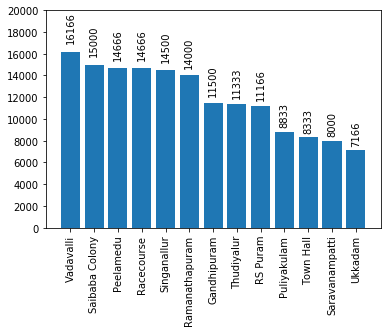

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rects1  = ax.bar(df_cbe["Neighborhood"].str.split(",", n = 1, expand = True)[0],df_cbe['Average Rent'], label="Example one")
plt.xticks(rotation=90)
ax.set_yticks([0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', rotation= 90)
        
autolabel(rects1)
plt.show


From the above graph, Vadavalli seems to be having the highest average rent rates and Uakkadam seems to be having the lowest rental rates. When we find the number of venues in those areas, I hope we could tell if there is any correlation exist between rental rates and number of venues. Example, if the number of venues also high in Vadavalli, then it might be the reason for more rental rates. And same case applies for Uakkadam in vice versa.

## Choropleth Map

Choropleth map is a map which uses differences in shading, colouring, or the placing of symbols within predefined areas to indicate the average values of a particular quantity in those areas.

We are now going to create Choropleth map to see renatal rates ranges in different areas in map version.

To create Choropleth map, we need geo data of Neighborhoods of Coimbatore. After severe searching of Geo data for Coimbatore, I was able to find out the geojson data of Coimbatore city and its neighborhoods using Ward numbers from **GitHub**. Fortunately, I was also able to find the wards numbers of the areas in our dataframe.

Now, we will download the geojson file of coimbatore city.

In [13]:
body = xxx # enter credentials to read json file contents
json_data = json.load(body)


Now, we have the geojson file "json_data" loaded to our notebook, let us create the Choropleth map. For that, we need to know the geographical location of Coimbatore city.

In [14]:
address = 'Coimbatore, TN'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Coimbatore city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Coimbatore city are 11.0018115, 76.9628425.


The geographical co-ordinates of Coimbatore are 11.0018115, 76.9628425. This data will be required to set zoom level, when we create our final Choloropleth map

Now, we will create a map of Coimbatore city.

In [15]:
Cbe_map = folium.Map(location=[11.0182714, 76.9677744], zoom_start=12, tiles='OpenStreetMap')
Cbe_map

In [16]:
# generate choropleth map using the Average Rent of each neighborhood in Coimbatore
Cbe_map.choropleth(
    geo_data=json_data,
    data=df_cbe,
    columns=['Ward No', 'Average Rent'],
    key_on='feature.properties.2011WardNumbers',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average rental rates in important areas of Coimbatore'
)

# display map
Cbe_map

By looking at the above Choropleth map, the rental rates ranges from 7,076 to 16,256. Since I am a resident of Coimbatore, I could see somthing strange in thie map. The City center seems to having low rental rates than neighborhoods which are far away from city center.

#### **Latitudes and Longitudes**
Next, we are going find out the latitudes and longitudes of the Neighborhoods in Coimbatore city

In [17]:
Lat = []
Lon = []
for index, row in df_cbe.iterrows(): # iterate over rows in dataframe

    address = row['Neighborhood']
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    Lat.append(latitude)
    Lon.append(longitude)
    
df_cbe['Latitude'] = Lat
df_cbe['Longitude'] = Lon
df_cbe.head()

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent,Latitude,Longitude
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166,11.025339,76.905125
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000,11.024334,76.944788
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666,11.026958,76.994581
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666,11.001079,76.977557
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500,11.002859,77.023495


Now, df_cbe contains two new columns  - **Latitude** and **Longitude**. To superimpose neighborhood locations over the Choropleth map, we will use the geo data of the neighborhoods in coimbatore.

In [18]:
# add markers to map
for lat, lng, label in zip(df_cbe['Latitude'], df_cbe['Longitude'], df_cbe['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Cbe_map)  
    
Cbe_map

Wow! we have successfully created a Choropleth map which shows the Coimbatore city and the superimposed neighborhoods marked using blue ovals along with different rental rates in those areas.

# Four-Square  API - Venues

Now are fininshed with creating a Choropleth map with neigborhoods marked. Next, we will find out the number and type of venues in those areas by sending API query to Foursqaure API.

In [69]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = 'xxx' # Foursquare API version


First, we will find out the number of venues in one important area of Coimbatore which is Gandhipuram, city center of Coimbatore

In [20]:
df_cbe.loc[0,'Neighborhood']

'Gandhipuram, Coimbatore'

In [21]:
Neighborhood_latitude = df_cbe.loc[0, 'Latitude'] # neighborhood latitude value
Neighborhood_longitude = df_cbe.loc[0, 'Longitude'] # neighborhood longitude value

Neighborhood_name = df_cbe.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Neighborhood_name, 
                                                               Neighborhood_latitude, 
                                                               Neighborhood_longitude))

Latitude and longitude values of Gandhipuram, Coimbatore are 11.0182714, 76.9677744.


We will find out 100 venues in the radius of 500 metres by passing query to FourSqaure API.

In [70]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Neighborhood_latitude, 
    Neighborhood_longitude, 
    radius, 
    LIMIT)






We will store the result of query passed to FourSquare in __results__ variable as Json file

In [24]:
results = requests.get(url).json()
print('Foursquare json downloaded')

Foursquare json downloaded


In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sree Annapoorna Sree Gowrishankar,Vegetarian / Vegan Restaurant,11.016260,76.967459
1,Sri Ganapathy silks,Women's Store,11.016775,76.968354
2,Glacier Park,Ice Cream Shop,11.017280,76.966143
3,Sree Annapoorna Sree Gowrishankar Hotels,Asian Restaurant,11.016498,76.965532
4,Adyar Ananda Bhavan,Snack Place,11.016269,76.971067


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


So, in Gandhipuram Area, we have 10 venues. Likewise, we will get the number of venues in each areas in our df_cbe

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:


cbe_venues = getNearbyVenues(names=df_cbe['Neighborhood'],
                                   latitudes=df_cbe['Latitude'],
                                   longitudes=df_cbe['Longitude']
                                  )



Vadavalli, Coimbatore
Saibaba Colony, Coimbatore
Peelamedu, Coimbatore
Racecourse, Coimbatore
Singanallur, Coimbatore
Ramanathapuram, Coimbatore
Gandhipuram, Coimbatore
Thudiyalur, Coimbatore
RS Puram, Coimbatore
Puliyakulam, Coimbatore
Town Hall, Coimbatore
Saravanampatti, Coimbatore
Ukkadam, Coimbatore


In [30]:
print(cbe_venues.shape)
cbe_venues.head()

(76, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Vadavalli, Coimbatore",11.025339,76.905125,Anandhas Vadavalli,11.028249,76.902898,Indian Restaurant
1,"Vadavalli, Coimbatore",11.025339,76.905125,Gokul Medicals,11.026533,76.906054,Pharmacy
2,"Vadavalli, Coimbatore",11.025339,76.905125,Nilgiris Departmental Store,11.025962,76.906247,Department Store
3,"Vadavalli, Coimbatore",11.025339,76.905125,Hotel Kavitha,11.027475,76.906194,Indian Restaurant
4,"Vadavalli, Coimbatore",11.025339,76.905125,Reliance World,11.027930,76.903725,Mobile Phone Shop


In [31]:
Cbe_venues_count = cbe_venues.groupby('Neighborhood', as_index = False).count()
Cbe_venues_count  = Cbe_venues_count .sort_values(by='Venue', ascending=False, na_position='first')
Cbe_venues_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,"RS Puram, Coimbatore",15,15,15,15,15,15
4,"Racecourse, Coimbatore",15,15,15,15,15,15
0,"Gandhipuram, Coimbatore",10,10,10,10,10,10
7,"Saravanampatti, Coimbatore",7,7,7,7,7,7
12,"Vadavalli, Coimbatore",7,7,7,7,7,7
9,"Thudiyalur, Coimbatore",5,5,5,5,5,5
6,"Saibaba Colony, Coimbatore",4,4,4,4,4,4
1,"Peelamedu, Coimbatore",3,3,3,3,3,3
8,"Singanallur, Coimbatore",3,3,3,3,3,3
10,"Town Hall, Coimbatore",3,3,3,3,3,3


The above table shows the number of venues in each area and that was one of our objective of this project. Now, as we decided already, we will try to see if there is any correlation between rent and number of venues. For that, we will have to create a new bar chart showing the count of venues. 

<function matplotlib.pyplot.show(*args, **kw)>

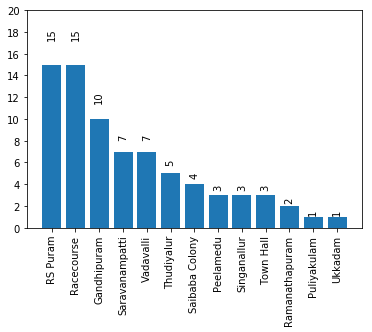

In [32]:

fig, ax = plt.subplots()
rects1  = ax.bar(Cbe_venues_count["Neighborhood"].str.split(",", n = 1, expand = True)[0],Cbe_venues_count['Venue'], label="Count of Venues")
plt.xticks(rotation=90)
ax.set_yticks([0,2, 4,6,8,10,12,14,16,18,20])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.15*height,
                '%d' % int(height),
                ha='center', va='bottom', rotation= 90)
        
autolabel(rects1)
plt.show


The above graph shows that RS Puram is having more venues than Vadavalli which was having the highest rent rates. However, Ukaadam seems to be matching our logic of rent rates directly porportionate to number of venues. Also, another thing to observe is that areas with more venues are those areas with low rent rates compared to the max rent rate "Vadavalli".

# Clustering
Next, we will try to cluster the venues and based on its characteristics we will name tham accordingly.

In [33]:
print('There are {} uniques categories.'.format(len(cbe_venues['Venue Category'].unique())))

There are 42 uniques categories.


In [34]:
# one hot encoding
cbe_onehot = pd.get_dummies(cbe_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cbe_onehot['Neighborhood'] = cbe_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cbe_onehot.columns[-1]] + list(cbe_onehot.columns[:-1])
cbe_onehot = cbe_onehot[fixed_columns]

cbe_onehot.head()

,Neighborhood,Accessories Store,Asian Restaurant,Bakery,Bar,Bistro,Bus Station,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,Gym,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Jewelry Store,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Outdoors & Recreation,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pool Hall,Restaurant,Road,Sandwich Place,Snack Place,Street Food Gathering,Vegetarian / Vegan Restaurant,Women's Store
0,"Vadavalli, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Vadavalli, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"Vadavalli, Coimbatore",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Vadavalli, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Vadavalli, Coimbatore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
cbe_onehot.shape

(76, 43)

In [36]:
cbe_grouped = cbe_onehot.groupby('Neighborhood').mean().reset_index()
cbe_grouped

,Neighborhood,Accessories Store,Asian Restaurant,Bakery,Bar,Bistro,Bus Station,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,Gym,Hospital,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Jewelry Store,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Outdoors & Recreation,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pool Hall,Restaurant,Road,Sandwich Place,Snack Place,Street Food Gathering,Vegetarian / Vegan Restaurant,Women's Store
0,"Gandhipuram, Coimbatore",0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.100000,0.300000,0.0,0.000000,0.000000,0.1,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.2
1,"Peelamedu, Coimbatore",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0
2,"Puliyakulam, Coimbatore",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,"RS Puram, Coimbatore",0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.133333,0.000000,0.000000,0.066667,0.0,0.000000,0.066667,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,"Racecourse, Coimbatore",0.000000,0.066667,0.066667,0.066667,0.066667,0.0,0.066667,0.066667,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,0.0
5,"Ramanathapuram, Coimbatore",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,"Saibaba Colony, Coimbatore",0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,"Saravanampatti, Coimbatore",0.000000,0.000000,0.285714,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0
8,"Singanallur, Coimbatore",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.333333,0.00,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,"Thudiyalur, Coi

In [37]:
cbe_grouped.shape

(13, 43)

Let us now create a list of each area with top three venues in that area which can used in our discussion part

In [38]:
num_top_venues = 3

for hood in cbe_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cbe_grouped[cbe_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Gandhipuram, Coimbatore----
               venue  freq
0  Indian Restaurant   0.3
1      Women's Store   0.2
2   Asian Restaurant   0.1


----Peelamedu, Coimbatore----
               venue  freq
0        Snack Place  0.33
1         Food Truck  0.33
2  Convenience Store  0.33


----Puliyakulam, Coimbatore----
                   venue  freq
0                    Gym   1.0
1      Accessories Store   0.0
2  Performing Arts Venue   0.0


----RS Puram, Coimbatore----
                  venue  freq
0                  Café  0.13
1  Fast Food Restaurant  0.13
2     Accessories Store  0.07


----Racecourse, Coimbatore----
            venue  freq
0  Ice Cream Shop  0.07
1     Coffee Shop  0.07
2           Hotel  0.07


----Ramanathapuram, Coimbatore----
               venue  freq
0           Hospital   0.5
1  Indian Restaurant   0.5
2  Accessories Store   0.0


----Saibaba Colony, Coimbatore----
                   venue  freq
0                 Bakery  0.25
1     Chinese Restaurant  0.25
2  Outd

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cbe_grouped['Neighborhood']

for ind in np.arange(cbe_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cbe_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(40)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Gandhipuram, Coimbatore",Indian Restaurant,Women's Store,Asian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Miscellaneous Shop,Dessert Shop,Fast Food Restaurant,Farmers Market
1,"Peelamedu, Coimbatore",Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop
2,"Puliyakulam, Coimbatore",Gym,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop
3,"RS Puram, Coimbatore",Café,Fast Food Restaurant,Accessories Store,Ice Cream Shop,Indian Restaurant,Electronics Store,Diner,Dessert Shop,Gym,Coffee Shop
4,"Racecourse, Coimbatore",Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro
5,"Ramanathapuram, Coimbatore",Indian Restaurant,Hospital,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner
6,"Saibaba Colony, Coimbatore",Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
7,"Saravanampatti, Coimbatore",Bakery,Food & Drink Shop,Snack Place,Indian Restaurant,Pool Hall,Pizza Place,Women's Store,Department Store,Fast Food Restaurant,Farmers Market
8,"Singanallur, Coimbatore",Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner
9,"Thudiyalur, Coimbatore",Bakery,Bus Station,Indie Movie Theater,Women's Store,Dessert Shop,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store


# K-means Clustering

**K-Means** is an unsupervised machine learning algorithm that groups data into **k** number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case.

Therefore we have to come up with a technique that somehow will help us decide how many clusters we should use for the K-Means model.

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

### Find _K_ using Elbow Method
Before clustering the venues, we will find the optimum clustering number **K** using **_Elbow Method_**

In [56]:
cbe_grouped_clustering = cbe_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cbe_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

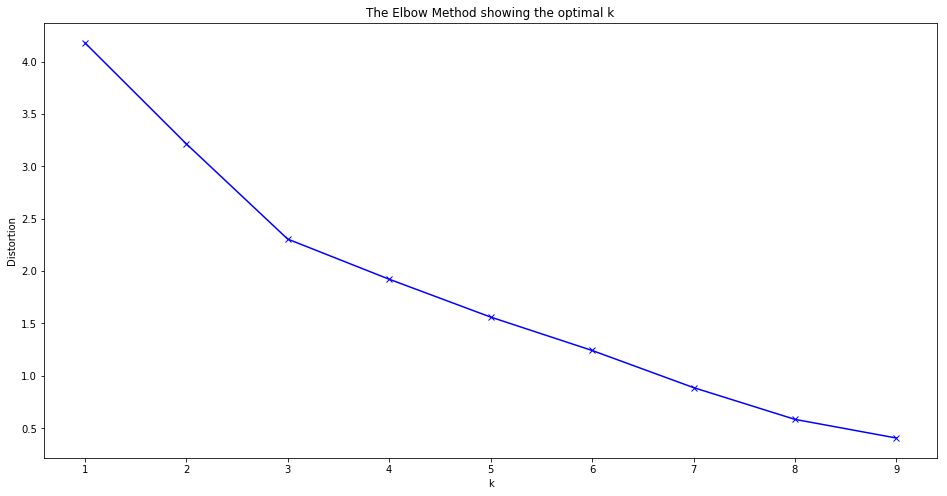

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As stated in the description of Elbow method, in the above visual, you could see the line bends like elbow at point **3*.Hence,the optimum value for _**K**_ is **3**

In [58]:
# set number of clusters
kclusters = 3


cbe_grouped_clustering = cbe_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cbe_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


cbe_merged = df_cbe

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cbe_merged = cbe_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cbe_merged.head() # check the last columns!

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166,11.025339,76.905125,0,Indian Restaurant,Department Store,Street Food Gathering,Pharmacy,Mobile Phone Shop,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000,11.024334,76.944788,0,Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666,11.026958,76.994581,0,Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666,11.001079,76.977557,0,Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500,11.002859,77.023495,0,Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner


In [60]:
cbe_merged.dropna(subset=["Cluster Labels"], inplace = True)
cbe_merged['Cluster Labels'] = cbe_merged[['Cluster Labels']].astype(int)  
cbe_merged

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166,11.025339,76.905125,0,Indian Restaurant,Department Store,Street Food Gathering,Pharmacy,Mobile Phone Shop,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000,11.024334,76.944788,0,Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666,11.026958,76.994581,0,Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666,11.001079,76.977557,0,Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500,11.002859,77.023495,0,Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner
1,"Ramanathapuram, Coimbatore",8000,14000,20000,68,14000,10.994777,76.992130,0,Indian Restaurant,Hospital,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner
0,"Gandhipuram, Coimbatore",7500,12000,15000,51,11500,11.018271,76.967774,0,Indian Restaurant,Women's Store,Asian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Miscellaneous Shop,Dessert Shop,Fast Food Restaurant,Farmers Market
6,"Thudiyalur, Coimbatore",6000,12000,16000,1,11333,11.080553,76.942150,0,Bakery,Bus Station,Indie Movie Theater,Women's Store,Dessert Shop,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
12,"RS Puram, Coimbatore",8000,11500,14000,24,11166,11.008018,76.950166,0,Café,Fast Food Restaurant,Accessories Store,Ice Cream Shop,Indian Restaurant,Electronics Store,Diner,Dessert Shop,Gym,Coffee Shop
9,"Puliyakulam, Coimbatore",6000,8500,12000,53,8833,11.005659,76.992244,1,Gym,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop


In [61]:
cbe_merged.loc[cbe_merged['Cluster Labels'] == 0, cbe_merged.columns[[1] + list(range(5, cbe_merged.shape[1]))]]

,1 BHK,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,8500,16166,11.025339,76.905125,0,Indian Restaurant,Department Store,Street Food Gathering,Pharmacy,Mobile Phone Shop,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
5,8000,15000,11.024334,76.944788,0,Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
3,9000,14666,11.026958,76.994581,0,Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop
8,9000,14666,11.001079,76.977557,0,Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro
2,7500,14500,11.002859,77.023495,0,Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner
1,8000,14000,10.994777,76.992130,0,Indian Restaurant,Hospital,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner
0,7500,11500,11.018271,76.967774,0,Indian Restaurant,Women's Store,Asian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Miscellaneous Shop,Dessert Shop,Fast Food Restaurant,Farmers Market
6,6000,11333,11.080553,76.942150,0,Bakery,Bus Station,Indie Movie Theater,Women's Store,Dessert Shop,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store
12,8000,11166,11.008018,76.950166,0,Café,Fast Food Restaurant,Accessories Store,Ice Cream Shop,Indian Restaurant,Electronics Store,Diner,Dessert Shop,Gym,Coffee Shop
4,3500,8000,11.074730,77.002712,0,Bakery,Food & Drink Shop,Snack Place,Indian Restaurant,Pool Hall,Pizza Place,Women's Store,Department Store,Fast Food Restaurant,Farmers Market


Cluster '0' seems to be toping with all kinds of shops and if any areas falls under this category, they are all filled to all kinds of venues which people will love to visit often. Most of the areas that we listed falls under this category only. However, when we consider the rent rates in those areas, they seem to differ.

Anyway, I would like to name these cluster as 'Top Class' Venues category

In [62]:
cbe_merged.loc[cbe_merged['Cluster Labels'] == 1, cbe_merged.columns[[1] + list(range(5, cbe_merged.shape[1]))]]

,1 BHK,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,6000,8833,11.005659,76.992244,1,Gym,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop


In [63]:
cbe_merged.loc[cbe_merged['Cluster Labels'] == 2, cbe_merged.columns[[1] + list(range(5, cbe_merged.shape[1]))]]

,1 BHK,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,6500,8333,10.996754,76.956623,2,Road,Jewelry Store,Men's Store,Women's Store,Department Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner
11,5000,7166,10.989522,76.956107,2,Jewelry Store,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop


Second Cluster contains only limited venues which would suit for youngersters and college students who dont have much money to spend to venues. So I would name it as "Students Class"

Third Cluster also contains only limited venues, but It might be suitable for low income earning families hence I would name it "Low Budget Family Class"

In [65]:
df_cat = {'Cluster Labels':[0,1,2],'Venue Category':['Top Class','Students Class','Low Budget Family Class']}
df_cat = pd.DataFrame(df_cat)
df_cat

,Cluster Labels,Venue Category
0,0,Top Class
1,1,Students Class
2,2,Low Budget Family Class


In [66]:
cbe_merged = cbe_merged.join(df_cat.set_index('Cluster Labels'), on='Cluster Labels')
cbe_merged

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166,11.025339,76.905125,0,Indian Restaurant,Department Store,Street Food Gathering,Pharmacy,Mobile Phone Shop,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000,11.024334,76.944788,0,Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666,11.026958,76.994581,0,Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop,Top Class
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666,11.001079,76.977557,0,Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro,Top Class
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500,11.002859,77.023495,0,Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner,Top Class
1,"Ramanathapuram, Coimbatore",8000,14000,20000,68,14000,10.994777,76.992130,0,Indian Restaurant,Hospital,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Top Class
0,"Gandhipuram, Coimbatore",7500,12000,15000,51,11500,11.018271,76.967774,0,Indian Restaurant,Women's Store,Asian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Miscellaneous Shop,Dessert Shop,Fast Food Restaurant,Farmers Market,Top Class
6,"Thudiyalur, Coimbatore",6000,12000,16000,1,11333,11.080553,76.942150,0,Bakery,Bus Station,Indie Movie Theater,Women's Store,Dessert Shop,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class
12,"RS Puram, Coimbatore",8000,11500,14000,24,11166,11.008018,76.950166,0,Café,Fast Food Restaurant,Accessories Store,Ice Cream Shop,Indian Restaurant,Electronics Store,Diner,Dessert Shop,Gym,Coffee Shop,Top Class
9,"Puliyakulam, Coimbatore",6000,8500,12000,53,8833,11.005659,76.992244,1,Gym,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop,Students Class


We have to categorize areas where the opportunities for opening new shop is high.

In [67]:
cbe_merged['Area Category'] = cbe_merged['Average Rent'].apply(lambda x:'Low Range' if x>7000 and x<9000 else 'Middle Range' if x>9000 and x<12000 else 'High Range' if x>12000 and x<17000 else "")
cbe_merged

,Neighborhood,1 BHK,2 BHK,3 BHK,Ward No,Average Rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Venue Category,Area Category
7,"Vadavalli, Coimbatore",8500,15000,25000,18,16166,11.025339,76.905125,0,Indian Restaurant,Department Store,Street Food Gathering,Pharmacy,Mobile Phone Shop,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class,High Range
5,"Saibaba Colony, Coimbatore",8000,12000,25000,22,15000,11.024334,76.944788,0,Outdoors & Recreation,Bakery,Indian Restaurant,Chinese Restaurant,Women's Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class,High Range
3,"Peelamedu, Coimbatore",9000,15000,20000,39,14666,11.026958,76.994581,0,Convenience Store,Food Truck,Snack Place,Women's Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop,Top Class,High Range
8,"Racecourse, Coimbatore",9000,15000,20000,71,14666,11.001079,76.977557,0,Hotel,Café,Vegetarian / Vegan Restaurant,Ice Cream Shop,Indian Restaurant,Department Store,Park,Chinese Restaurant,Coffee Shop,Bistro,Top Class,High Range
2,"Singanallur, Coimbatore",7500,15000,21000,64,14500,11.002859,77.023495,0,Farmers Market,Multiplex,Performing Arts Venue,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Electronics Store,Diner,Top Class,High Range
1,"Ramanathapuram, Coimbatore",8000,14000,20000,68,14000,10.994777,76.992130,0,Indian Restaurant,Hospital,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Top Class,High Range
0,"Gandhipuram, Coimbatore",7500,12000,15000,51,11500,11.018271,76.967774,0,Indian Restaurant,Women's Store,Asian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,Ice Cream Shop,Miscellaneous Shop,Dessert Shop,Fast Food Restaurant,Farmers Market,Top Class,Middle Range
6,"Thudiyalur, Coimbatore",6000,12000,16000,1,11333,11.080553,76.942150,0,Bakery,Bus Station,Indie Movie Theater,Women's Store,Dessert Shop,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Top Class,Middle Range
12,"RS Puram, Coimbatore",8000,11500,14000,24,11166,11.008018,76.950166,0,Café,Fast Food Restaurant,Accessories Store,Ice Cream Shop,Indian Restaurant,Electronics Store,Diner,Dessert Shop,Gym,Coffee Shop,Top Class,Middle Range
9,"Puliyakulam, Coimbatore",6000,8500,12000,53,8833,11.005659,76.992244,1,Gym,Women's Store,Department Store,Food Truck,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,Dessert Shop,Students Class,Low Range


In [68]:
# create map
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cbe_merged['Latitude'], cbe_merged['Longitude'], cbe_merged['Neighborhood'], cbe_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Cbe_map)
       
Cbe_map

# RESULTS AND DISCUSSION

The final table shows the areas categorized under two different titles. One is categorized under the title "Average Rent" and another under "Venues" in each area. The table shows areas where people could move with low rent rates and more venues, or move to areas where venues are student oriented and yet high rent rates etc. It also shows the areas where business people could consider about opening new venues.

Initially, after downloading the data about different rent rates based on number of rooms in a house, I decided to find out the mean or average rent rates to keep the focus of including all kinds of house for all types of people. After that I created a bar graph to visually see the rent rates sorted in descending order. From that, I could see **"Vadavalli"** areas was having the highest rent rates and **"Ukkadam"** was having the lowest rent rate of all. The reason to collect this data was to find any correlation between rent rates and availability of number of venues in an area, to see, if they are directly proportionate to each other. **Example - high rent rates in might be due to more number of venues available**.

Then I decided to create choropleth map to see the shading of Coimbatore location with average rent rates. When I created the map, it was bit of shock to see **"Gandhipuram"** area, which is the city center, was showing moderate rent rate compared to areas far away from city center with high rent rates. As a resident of Coimbatore, I could assume the reason for **"Vadavalli"** being the place with high rent rates because it is a residential area. Along wiht map, to identify different areas, I used geopy package to find out the latitude and longitude of important areas of Coimbatore.

Then, my next step was obviously findind out the number of venues in each area. By passing query to **"Foursquare API"**, I found out the count of venues in each area. Then, I created a bar graph to see if that graph matches with our another graph "Rent Rates". I compared the data and found that rent rates are not directly proportionalte to number of venues completely. Because, I expected "Vadavalli" to be having more number of venues becuase of high rent rates. But **Racecourse, RS Puram, Gandhipuram** occupied the first three places moving **Vadavalli** to fourth place in count of venues. As I assumed earlier, Vadavalli's rent rate is high which might be due to its residential nature or some other factors. Now, we have the count, from the table data, I could say that, **Racecourse, RS Puram, Gandhipuram** would be optimum place for people who are moving to Coimbatore with their families because the rent rates are moderate and availability of venues also high. Likewise, **Ukkadam, Townhall, Puliyakulam** are the areas where business people should consider opening new shops. The reason being, the rent rates are moderte and if more venues are opened, there are high chances that new people who migrate will find these places appropraite.

As a additional information, I tried to cluster the venues and provided them name based on their characteristics, hence, people could select areas with venues which they like. Also, Business people could see whether they could open shops which are not available in these areas. Example, Pharmacy is not available in "Low Budget Family Class". Hence, opening a shop in those areas would be beneficial.

I used **_K_ Means Clustering** technique to cluster the venues. For identifying the optimim **_K_**, I used **"Elbow Method"** which showed **3** as the optimum value. Hence, created 3 clusters and named them according to thier characteristics.

Finally, I created a Choropleth map using "Average Rent" rates and superimposed clusters labels. To analyze the results, I created a dataframe which shows all the areas with two columns - "Category" showing the venue category and "Area Category" showing rental category. From that, one could identify the areas where one could move with their family and business people could identify areas to explore. It can be further extended if we could get more data regarding rental rates in all areas of Coimabore and by using various other data science methods or techniques, we could drill much more information.




# Conclusion

The final result seems to be promising in fullfilling the objectives of our project. When we see the final table after naming the different clusters, we could find that there are few areas which are city centers with more number of venues and yet the rental rates are normal when compared to places with less venues and higher rent. However, there are many factors which affects the rent rates in different areas and "Vadavalli" is an example of that. If we have more information, we could drill down further as to see why the rental rates are high and what are the other factors affecting the rent rates. That might help people to look for areas with different characteristics which might suit them more than just venues. Also, by describing areas in detail could help business people to decide what kind of venue would suit those areas or to find out what are the other business propects available in those areas.
